In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk(f'{os.getcwd()}/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Academic_success_classification/dataset/data.csv
/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Academic_success_classification/dataset/train.csv
/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Academic_success_classification/dataset/test.csv


In [2]:
train_df = pd.read_csv("./dataset/train.csv")
test_df = pd.read_csv("./dataset/test.csv")
train_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
train_df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [5]:
train_df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [6]:
numerical_columns = []
categorical_columns = []
for col in train_df.columns:
    if len(train_df[col].unique()) <= 10:
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)
print(f"Numerical: {numerical_columns}")
print(f"Categorical: {categorical_columns}")

Numerical: ['id', 'Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Categorical: ['Marital status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Internat

My Categorical: ['Marital status', 
                 'Application mode', 
                 'Application order', 
                 'Course', 
                 'Daytime/evening attendance', 
                 'Previous qualification', 
                 'Displaced', 
                 'Nacionality', 
                 "Mother's qualification", 
                 "Father's qualification", 
                 "Mother's occupation", 
                 "Father's occupation", 
                 'Educational special needs', 
                 'Debtor', 
                 'Tuition fees up to date', 
                 'Gender', 
                 'Scholarship holder', 
                 'International', 
                 'Target']

My Numerical: ['Previous qualification (grade)',
       'Admission grade',
       'Unemployment rate',
       'Inflation rate',
       'GDP',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)']

In [7]:
train_df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [16]:
def corr_matrix(cols, df):
    # Correlation matrix
    df_copy = df[cols].copy()
    
    if isinstance(df_copy['Target'][0], str):
        df_copy['Target'] = df_copy['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
    corr_matrix = df_copy.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
    

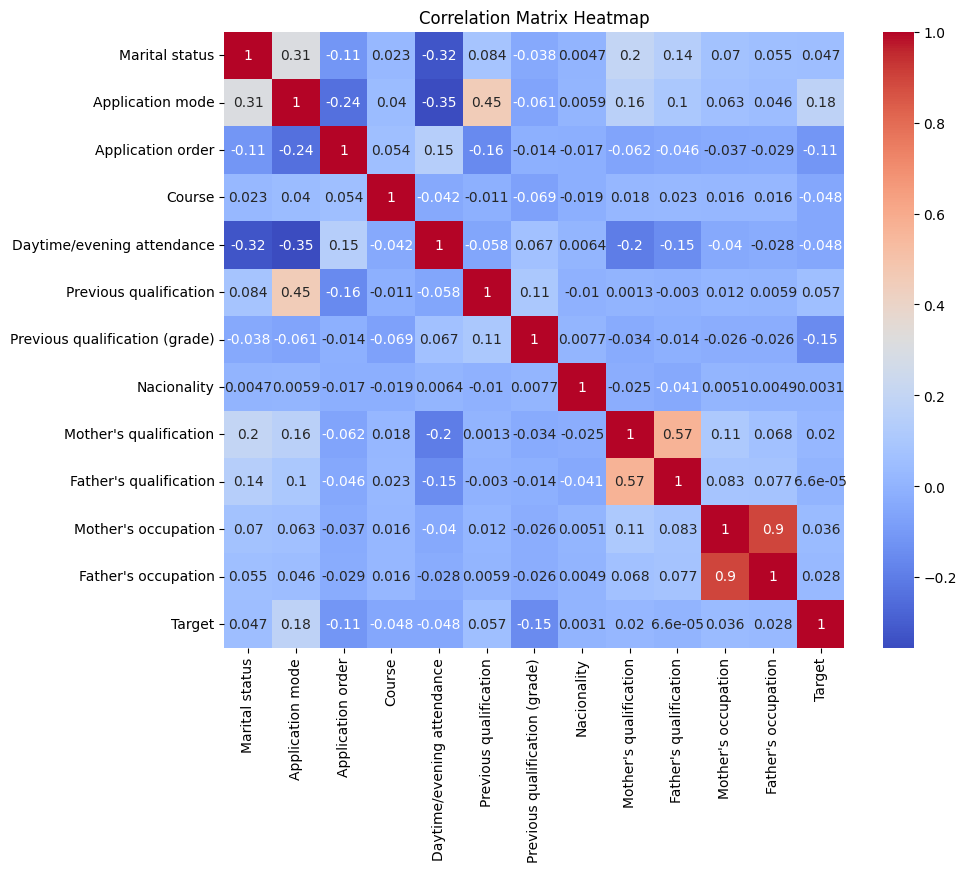

In [17]:
corr_matrix(['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Target'], train_df)

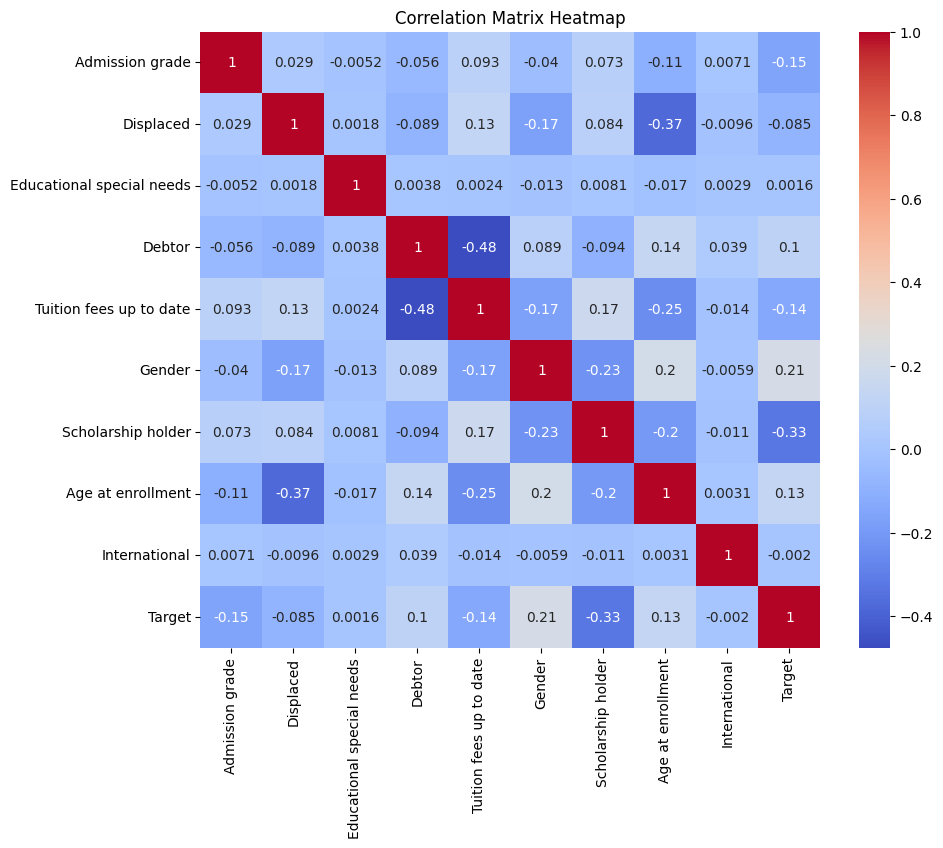

In [18]:
corr_matrix(['Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Target'], train_df)

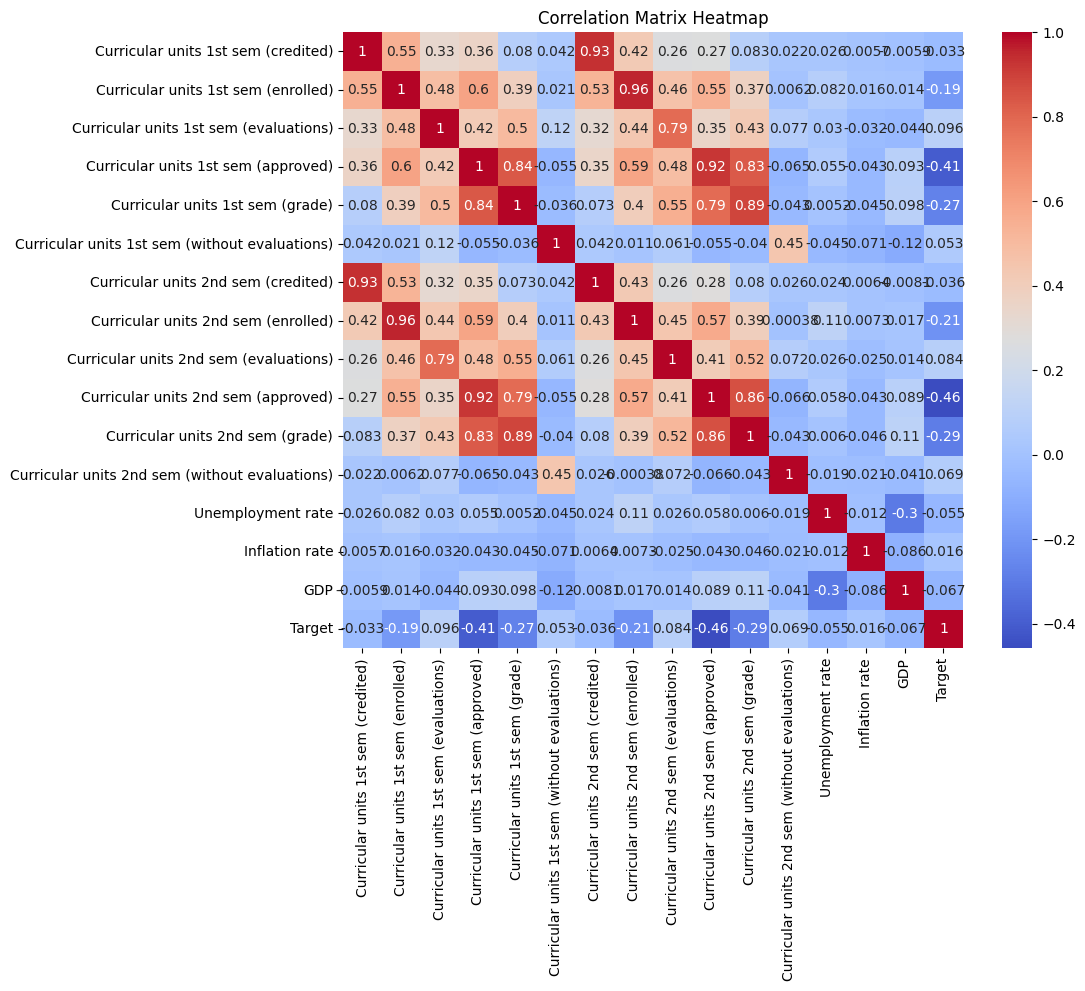

In [19]:
corr_matrix(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'], train_df)

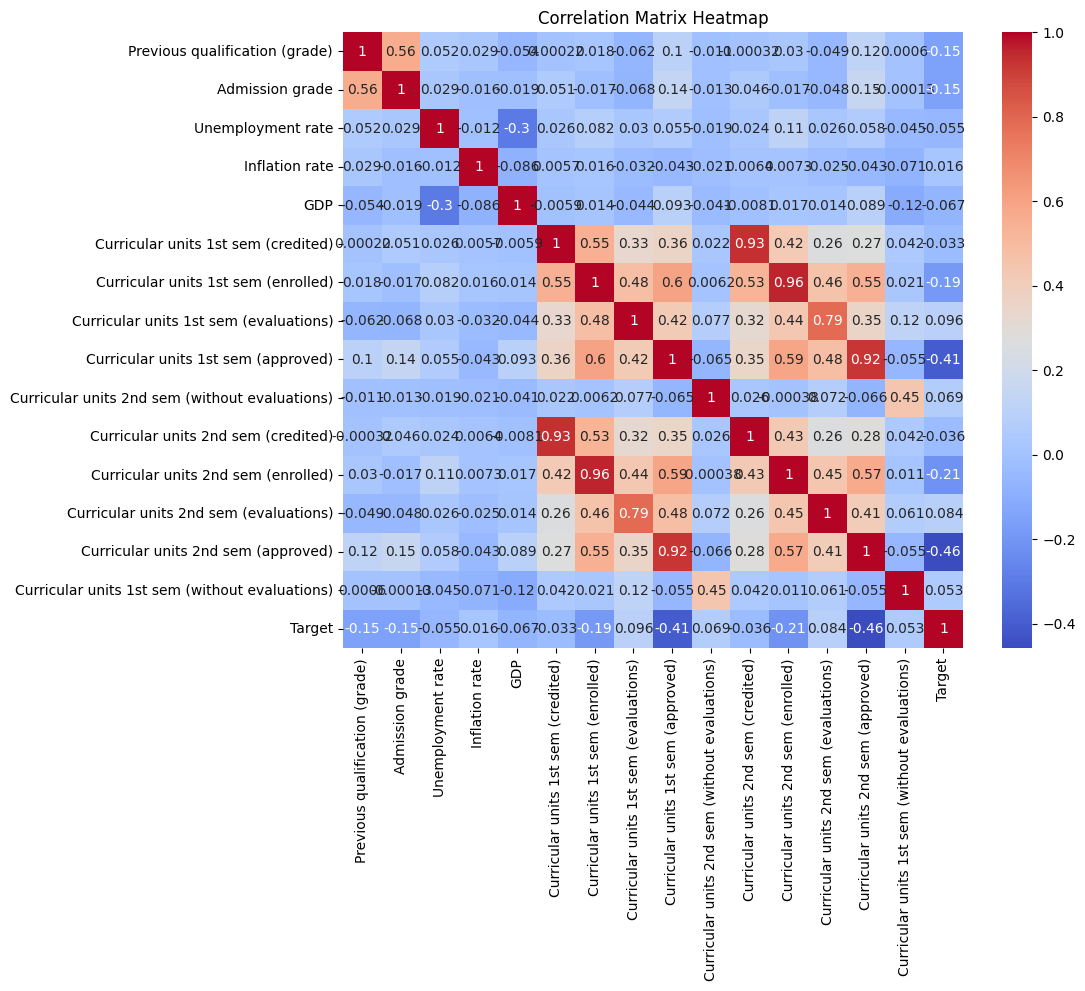

In [20]:
corr_matrix(['Previous qualification (grade)',
       'Admission grade',
       'Unemployment rate',
       'Inflation rate',
       'GDP',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Target'], train_df)

In [21]:
def plot_clusters(df, x, y):
    df_copy = df.copy()

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue='Target', data=df_copy)
    plt.title(f"{y} vs {x}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

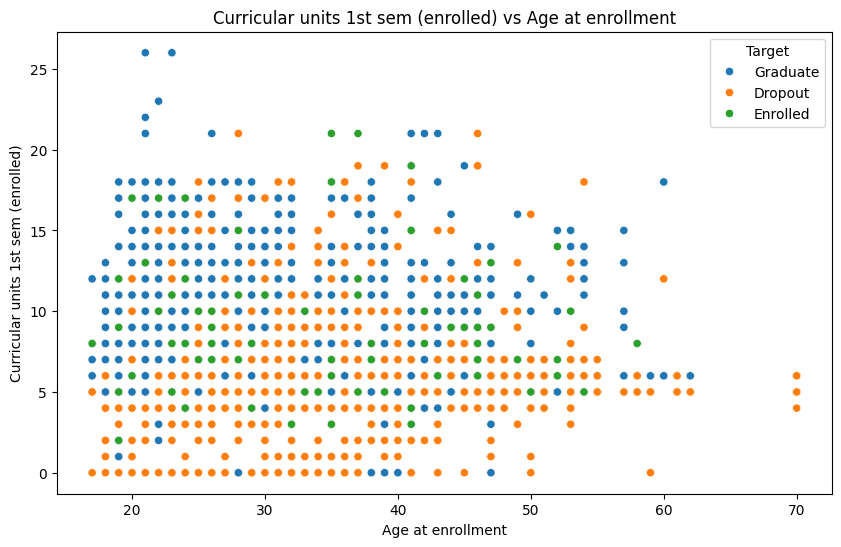

In [22]:
plot_clusters(train_df, "Age at enrollment", "Curricular units 1st sem (enrolled)")

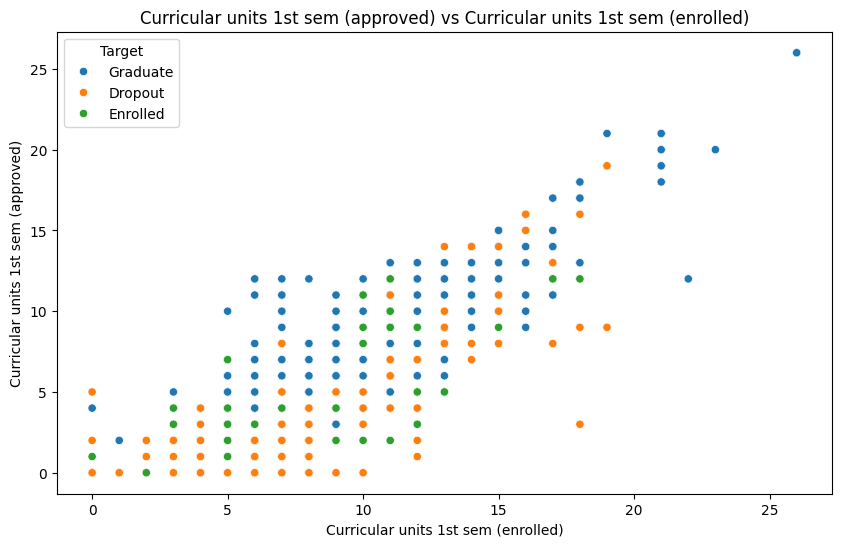

In [23]:
plot_clusters(train_df, "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)")

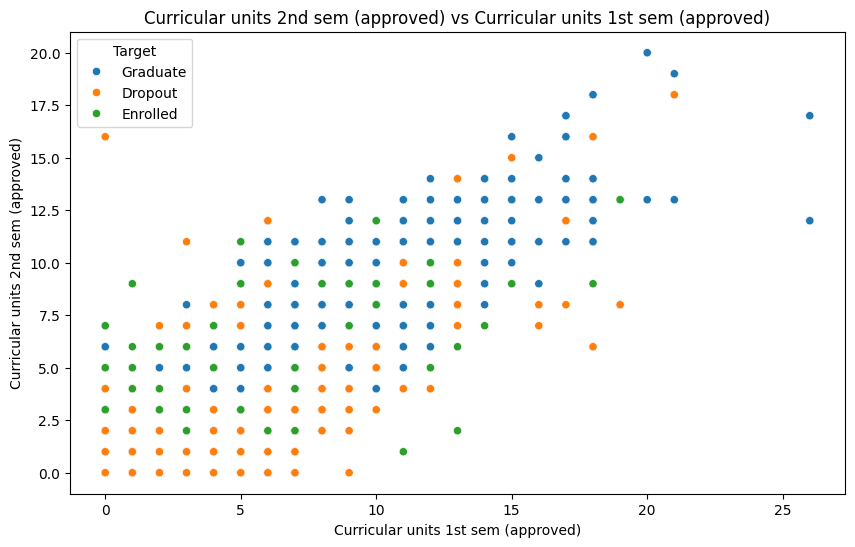

In [24]:
plot_clusters(train_df, "Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)")

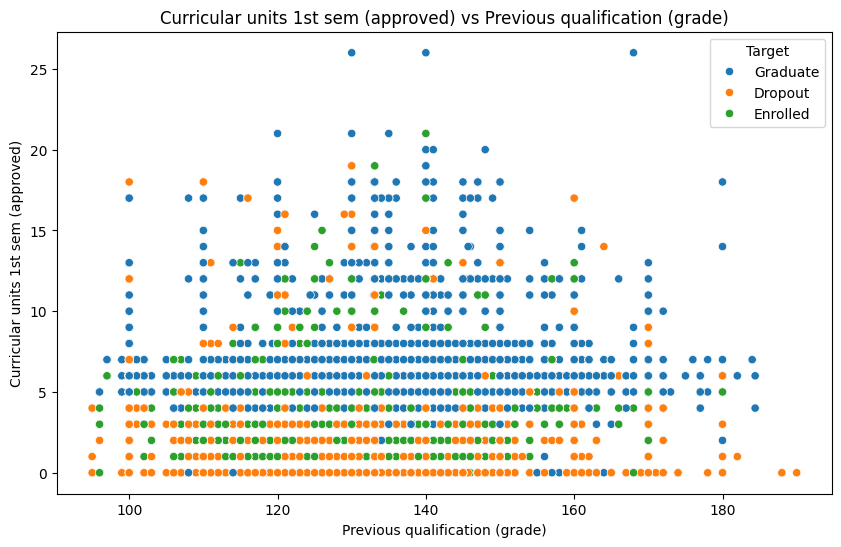

In [25]:
plot_clusters(train_df, "Previous qualification (grade)", "Curricular units 1st sem (approved)")

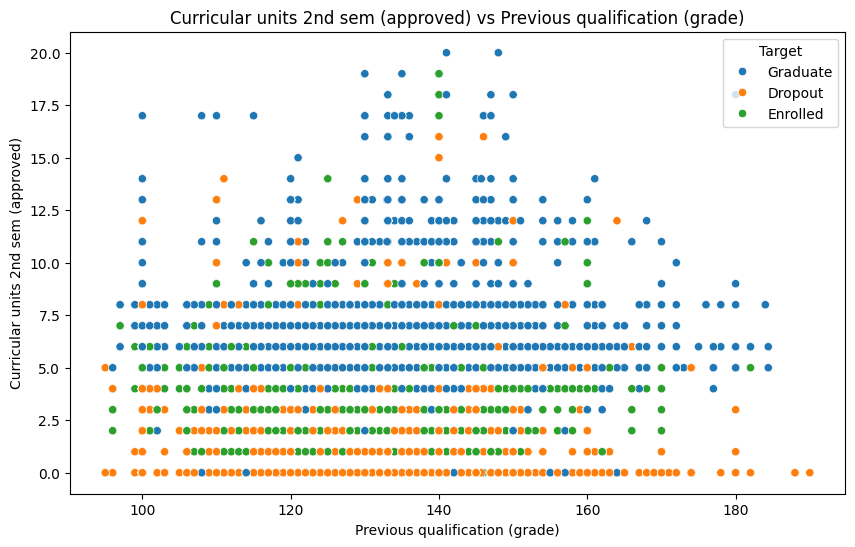

In [26]:
plot_clusters(train_df, "Previous qualification (grade)", "Curricular units 2nd sem (approved)")

In [27]:
def pairplot(df):
       # Pair plot
       df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})
       sns.pairplot(df, hue='Target', markers=["o", "s", "D"])
       plt.suptitle('Pairplot of Academic Success Dataset', y=1.02)
       plt.show()


/tmp/ipykernel_145258/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


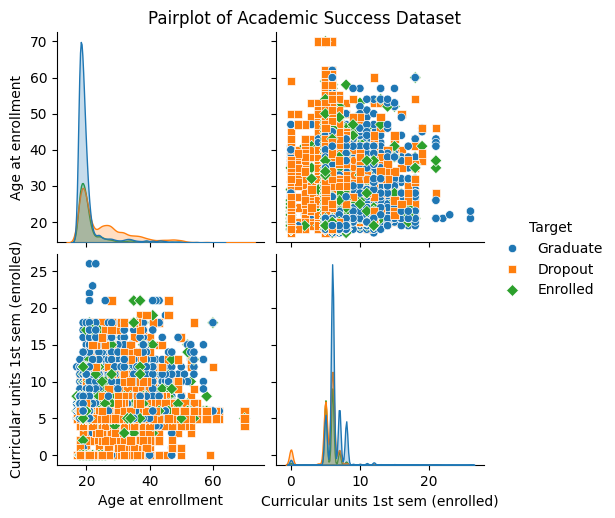

In [28]:
pairplot(train_df[["Age at enrollment", "Curricular units 1st sem (enrolled)", 'Target']])

/tmp/ipykernel_145258/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


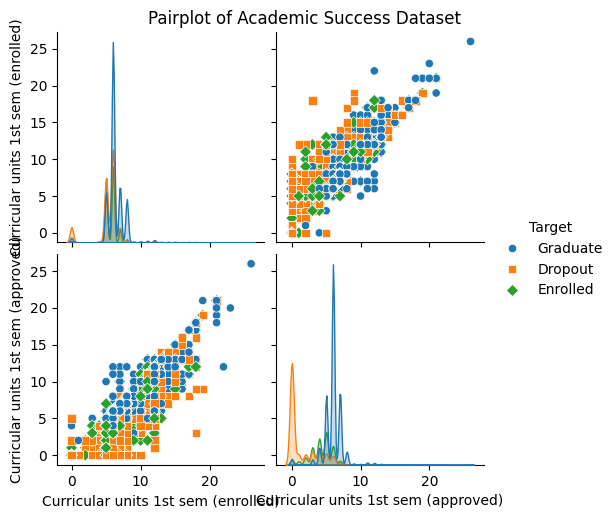

In [29]:
pairplot(train_df[["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", 'Target']])

/tmp/ipykernel_145258/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


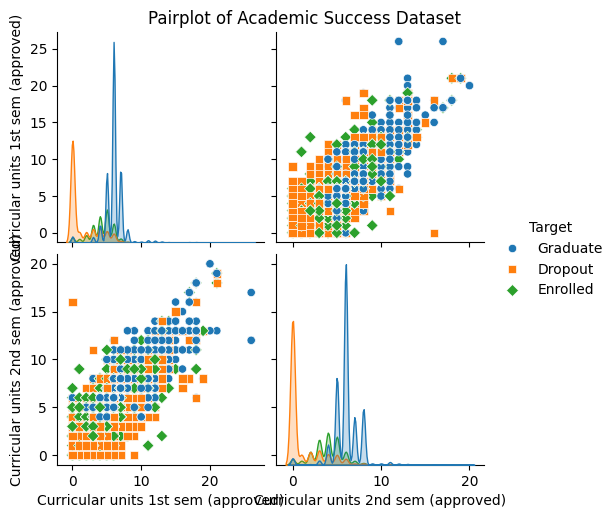

In [30]:
pairplot(train_df[["Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)", 'Target']])

/tmp/ipykernel_145258/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


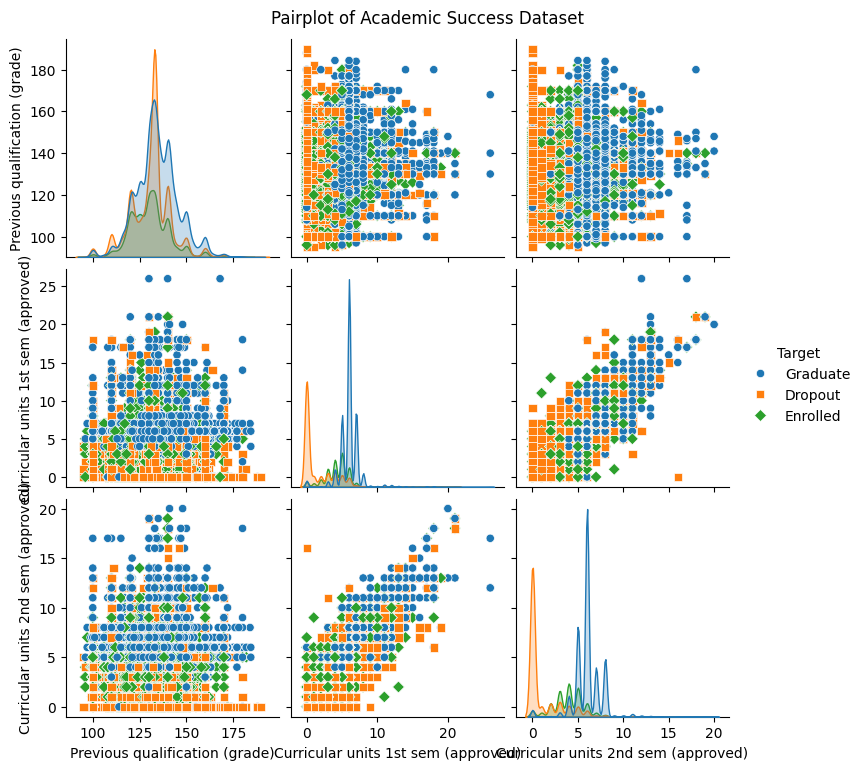

In [31]:
pairplot(train_df[["Previous qualification (grade)", "Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)", 'Target']])

In [32]:
def pie_chart(df, label):
    # Labels and counts
    counts = df.value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#3487ff', '#73acff', '#a1c7ff'])
    plt.title(label)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

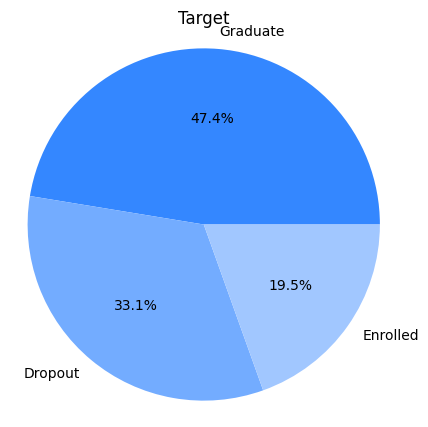

In [33]:
pie_chart(train_df['Target'], 'Target')

In [44]:
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
import scipy.sparse

# Custom transformer to concatenate original features with PCA components
class OriginalPlusPCA(BaseEstimator, TransformerMixin):
    def __init__(self, pca_components):
        self.pca = PCA(n_components=pca_components)

    def fit(self, X, y=None):
        if scipy.sparse.issparse(X):
            X = X.toarray()
        self.pca.fit(X)
        return self
    
    def transform(self, X):
        if scipy.sparse.issparse(X):
            X = X.toarray()  # Convert sparse matrix to dense
        pca_transformed = self.pca.transform(X)
        return np.hstack([X, pca_transformed])

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import scipy

def preprocessing(df, is_train=True):

    numerical_features = ['Previous qualification (grade)',
       'Admission grade',
       'Unemployment rate',
       'Inflation rate',
       'GDP',
       'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)']
    categorical_features = ['Marital status', 
                 'Application mode', 
                 'Application order', 
                 "Mother's qualification", 
                 "Father's qualification", 
                 'Course', 
                 'Daytime/evening attendance', 
                 'Previous qualification', 
                 'Displaced', 
                 'Nacionality', 
                 "Mother's occupation", 
                 "Father's occupation", 
                 'Educational special needs', 
                 'Debtor', 
                 'Tuition fees up to date', 
                 'Gender', 
                 'Scholarship holder', 
                 'International',
                 'Curricular units 2nd sem (without evaluations)',
                 'Curricular units 1st sem (without evaluations)'
                 ]
    
    numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('original_plus_pca', OriginalPlusPCA(pca_components=6))
        ])
    df_transformed = pipeline.fit_transform(df)
    
    columns_transformed = numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)) + ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']
    print(numerical_features)
    print(list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))

    # Convert the sparse matrix to a dense array if necessary
    if isinstance(df_transformed, scipy.sparse.csr_matrix):
        df_transformed = df_transformed.toarray()
        print(type(df_transformed))  # Should be <class 'numpy.ndarray'>

    df_transformed = pd.DataFrame(df_transformed, columns=columns_transformed)
    
    df_transformed = pd.concat([pd.DataFrame(df[['id']], columns=['id']), df_transformed], axis=1) 
    
    if(is_train):
        df_transformed['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
        
        
    return df_transformed, pipeline.fit(df), columns_transformed

In [55]:
processed_df, pipeline, columns_transformed = preprocessing(train_df)
processed_df

['Previous qualification (grade)', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
['Marital status_1', 'Marital status_2', 'Marital status_3', 'Marital status_4', 'Marital status_5', 'Marital status_6', 'Application mode_1', 'Application mode_2', 'Application mode_3', 'Application mode_4', 'Application mode_5', 'Application mode_7', 'Application mode_9', 'Application mode_10', 'Application mode_12', 'Application mode_15', 'Application mode_16', 'Application mode_17', 'Application mode_18', 'Application mode_26', 'Application mode_27', 'Application mode_35', 'Applic

,id,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),...,Curricular units 1st sem (without evaluations)_9,Curricular units 1st sem (without evaluations)_10,Curricular units 1st sem (without evaluations)_12,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,Target
0,0,-0.580138,-0.220022,-0.158418,-0.449110,0.933176,-0.621067,-0.160702,0.064892,-0.385478,...,0.0,0.0,0.0,1.050288,-1.229045,-0.616123,0.723497,-0.291815,0.238434,0
1,1,-0.671086,-0.442912,-0.158418,-0.449110,0.933176,-0.621067,-0.160702,0.064892,0.184603,...,0.0,0.0,0.0,-0.778006,0.226653,-1.101134,0.862269,-0.270818,0.583317,1
2,2,0.420293,1.539217,1.763675,-0.663578,-0.372698,-0.621067,-0.160702,0.064892,-2.095724,...,0.0,0.0,0.0,-3.452070,0.330944,2.546649,0.236897,-2.149812,0.858153,1
3,3,-0.125396,0.058591,-0.158418,-0.449110,0.933176,-0.621067,-0.160702,0.663062,0.469644,...,0.0,0.0,0.0,2.493507,-0.981607,-0.536468,0.617585,-0.248557,0.066719,2
4,4,-0.034448,-0.419031,-1.477502,0.980680,0.178079,-0.621067,-0.160702,0.663062,1.324767,...,0.0,0.0,0.0,2.142716,-0.490681,-1.173693,0.355554,0.642730,-1.202490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,-1.034880,-0.705604,0.896848,-1.092515,0.386841,-0.621067,-0.160702,0.064892,0.469644,...,0.0,0.0,0.0,0.842639,-0.583763,-1.227658,0.117720,-1.249711,1.144578,0
76514,76514,-0.671086,0.496410,-0.799116,-1.449963,-1.349882,-0.475912,-0.160702,0.064892,4.175176,...,0.0,0.0,0.0,2.057505,-0.296560,-1.325108,-0.967290,0.645390,1.903822,0
76515,76515,0.511242,-0.164300,-0.799116,-1.449963,-1.349882,-0.475912,-0.160702,-0.533278,1.609808,...,0.0,0.0,0.0,0.466066,-0.398983,-0.431540,-0.822751,0.884921,1.434429,2
76516,76516,0.329345,-0.044894,-1.477502,0.980680,0.178079,-0.621067,-0.160702,0.064892,-2.095724,...,0.0,0.0,0.0,-3.444813,0.041992,1.079370,2.260793,-0.900650,-1.778990,1


In [56]:
processed_df.columns

Index(['id', 'Previous qualification (grade)', 'Admission grade',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       ...
       'Curricular units 1st sem (without evaluations)_9',
       'Curricular units 1st sem (without evaluations)_10',
       'Curricular units 1st sem (without evaluations)_12', 'PCA1', 'PCA2',
       'PCA3', 'PCA4', 'PCA5', 'PCA6', 'Target'],
      dtype='object', length=327)

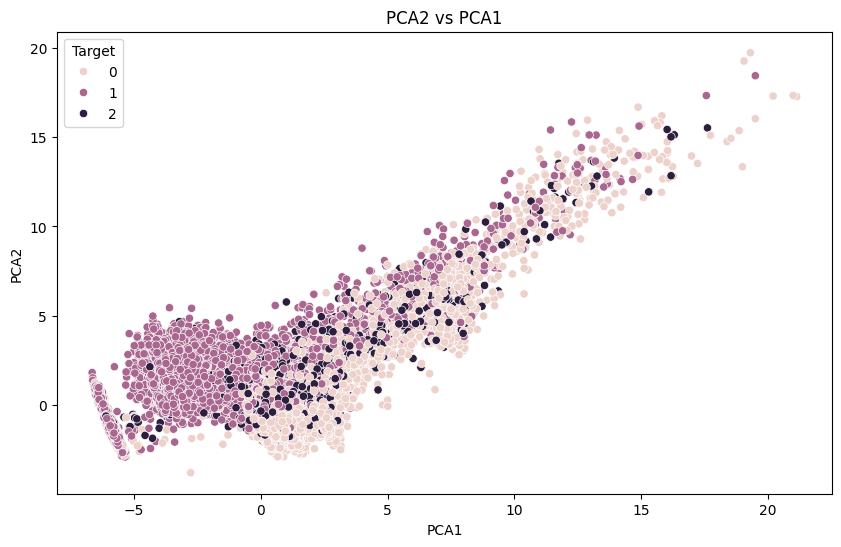

In [57]:
plot_clusters(processed_df, 'PCA1', 'PCA2')

/tmp/ipykernel_145258/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


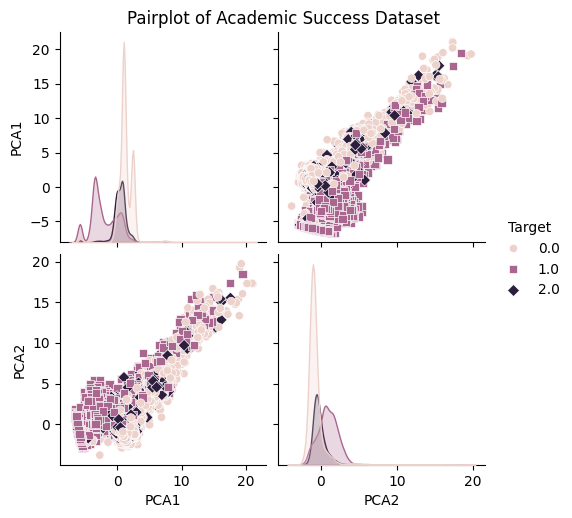

In [58]:
pairplot(processed_df[["PCA1", "PCA2", 'Target']])

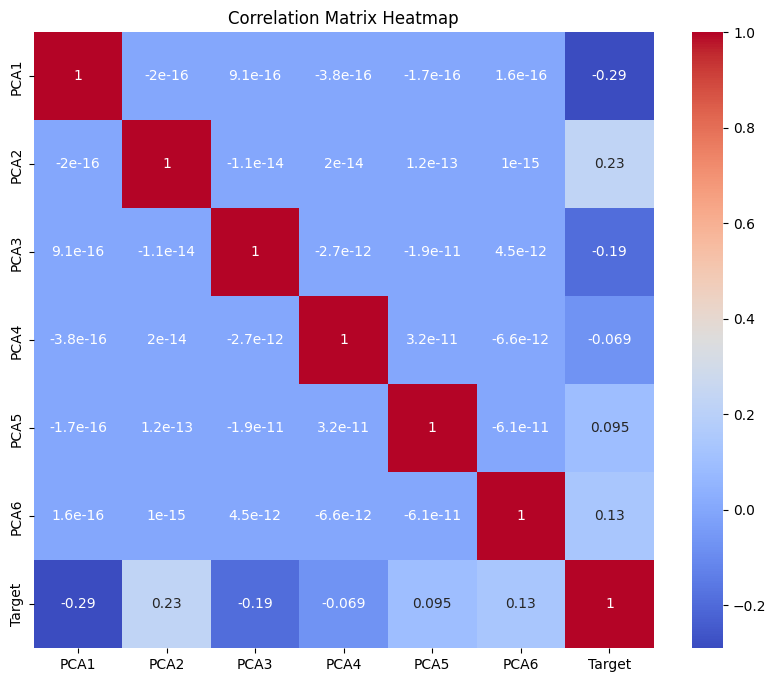

In [59]:
corr_matrix(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'Target'], processed_df)

In [60]:
from sklearn.model_selection import train_test_split
X_columns = [
            'Age at enrollment',
            'Previous qualification (grade)', 
            'Admission grade',
            'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)',
            'Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)',
            'Application mode_1',
            'Application mode_2',
            'Application mode_3',
            'Application mode_4',
            'Application mode_5',
            'Application mode_7',
            'Application mode_9',
            'Application mode_10',
            'Application mode_12',
            'Application mode_15',
            'Application mode_16',
            'Application mode_17',
            'Application mode_18',
            'Application mode_26',
            'Application mode_27',
            'Application mode_35',
            'Application mode_39',
            'Application mode_42',
            'Application mode_43',
            'Application mode_44',
            'Application mode_51',
            'Application mode_53',
            'Application order_0',
            'Application order_1',
            'Application order_2',
            'Application order_3',
            'Application order_4',
            'Application order_5',
            'Application order_6',
            'Application order_9',
            'Debtor_0',
            'Debtor_1',
            'Tuition fees up to date_0',
            'Tuition fees up to date_1',
            'Gender_0',
            'Gender_1',
            'Scholarship holder_0',
            'Scholarship holder_1',
            'PCA1',
            'PCA2',
            'PCA3',
            'PCA6',]
y_columns = ['Target']
X = processed_df[X_columns]
y = processed_df[y_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.model_selection import GridSearchCV

def findBestParams(model, params, X, y):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', verbose=10)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X, y.values.ravel())

    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Display the results
    print("Best Hyperparameters:", best_params)
    return best_model

In [62]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 250, 350],
    'max_depth': [35, 45, 55],
    'min_samples_split': [5, 15],
    'min_samples_leaf': [2, 5],
}

rf_model = findBestParams(RandomForestClassifier(), param_grid, X_train, y_train)
rf_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 1/36] END max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.826 total time=  10.3s
[CV 2/5; 1/36] START max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 1/36] END max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.818 total time=   9.2s
[CV 3/5; 1/36] START max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 1/36] END max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.816 total time=   9.9s
[CV 4/5; 1/36] START max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 1/36] END max_depth=35, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.820 total time=  10.4s
[CV 5/5; 1/36] START max_depth=35, min_samples_leaf=2, min_samples_spl

RandomForestClassifier(max_depth=55, min_samples_leaf=2, min_samples_split=15,
                       n_estimators=250)

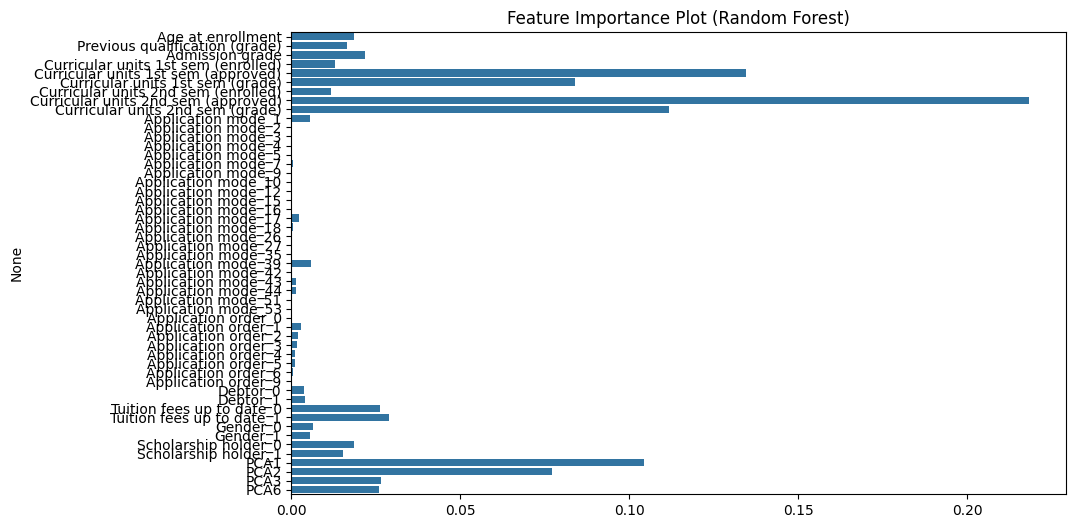

In [63]:
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance Plot (Random Forest)')
plt.show()

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay

def get_metrics(y_pred, y_true):
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    # Generate classification report
    report = classification_report(y_true, y_pred)
    print("Classification Report:\n", report)


Accuracy: 0.8232488238369053


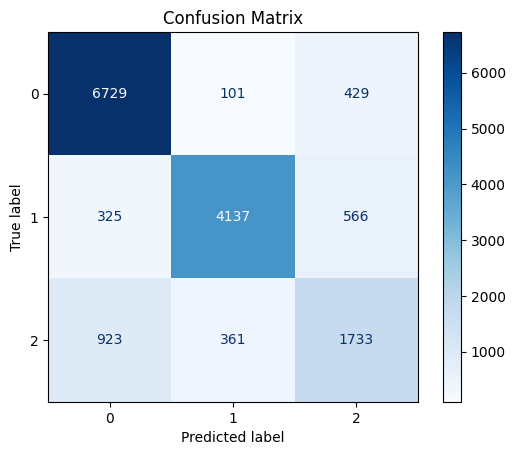

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7259
           1       0.90      0.82      0.86      5028
           2       0.64      0.57      0.60      3017

    accuracy                           0.82     15304
   macro avg       0.79      0.77      0.78     15304
weighted avg       0.82      0.82      0.82     15304



In [65]:
rf_pred = rf_model.predict(X_test)
get_metrics(rf_pred, y_test)

In [66]:
def get_submission(y_pred, id_column, target_cols, filename):
    df = pd.DataFrame(data=y_pred, columns=target_cols)
    df["id"] = id_column
    df = df[['id', 'Target']]
    df['Target'] = df['Target'].copy().map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})
    df.to_csv('./submission/'+filename+'.csv', index=False)
    print(df)

In [67]:
test_transformed = pipeline.transform(test_df)
# Convert the sparse matrix to a dense array if necessary
if isinstance(test_transformed, scipy.sparse.csr_matrix):
    test_transformed = test_transformed.toarray()
    print(type(test_transformed))  # Should be <class 'numpy.ndarray'>

test_processed_df = pd.DataFrame(test_transformed, columns=columns_transformed)
test_processed_df = pd.concat([pd.DataFrame(test_df[['id']], columns=['id']), test_processed_df], axis=1)
test_processed_df

,id,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),...,Curricular units 1st sem (without evaluations)_8,Curricular units 1st sem (without evaluations)_9,Curricular units 1st sem (without evaluations)_10,Curricular units 1st sem (without evaluations)_12,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,76518,0.784087,2.128284,0.896848,-1.092515,0.386841,-0.621067,-0.160702,0.663062,-2.095724,...,0.0,0.0,0.0,0.0,-2.738720,0.371748,3.077720,1.054120,-1.545492,0.691345
1,76519,-0.398241,-0.705604,-0.158418,-0.449110,0.933176,-0.475912,-0.160702,0.064892,-0.100437,...,0.0,0.0,0.0,0.0,1.007292,-1.018359,-0.839384,0.673289,-0.255576,0.257527
2,76520,-1.307724,-0.888692,1.499858,1.123659,-1.767406,-0.621067,-0.160702,0.064892,1.039726,...,0.0,0.0,0.0,0.0,1.240997,0.069450,-1.173635,-2.107518,-1.738551,-0.467624
3,76521,-0.216345,0.369045,-0.987556,0.122806,1.594996,0.104707,1.541009,0.064892,2.179890,...,0.0,0.0,0.0,0.0,3.010777,2.249101,-0.150595,1.648525,1.405759,0.865144
4,76522,-2.035311,-1.541442,-1.477502,0.980680,0.178079,0.540171,-0.160702,0.064892,0.469644,...,0.0,0.0,0.0,0.0,-0.084638,0.720053,-2.757598,0.537042,0.332250,-1.197922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,-0.398241,-0.052855,1.499858,1.123659,-1.767406,-0.475912,-0.160702,-3.524128,-2.095724,...,0.0,0.0,0.0,0.0,-5.836381,-1.030639,1.245436,-0.458640,-1.896540,-0.221393
51008,127526,0.065595,1.165081,-0.799116,-1.449963,-1.349882,1.556255,-0.160702,-0.533278,-0.385478,...,0.0,0.0,0.0,0.0,-3.590983,2.149661,0.986714,-0.687632,1.287548,1.301997
51009,127527,-0.489190,-0.395150,1.499858,1.123659,-1.767406,-0.330758,-0.160702,-3.524128,-2.095724,...,0.0,0.0,0.0,0.0,-6.031451,-0.541967,1.066264,-0.716283,-1.890446,0.075007
51010,127528,-0.034448,0.074511,-1.477502,0.980680,0.178079,-0.621067,-0.160702,0.064892,0.184603,...,0.0,0.0,0.0,0.0,0.548217,-0.822337,-0.572068,0.797652,0.435402,-0.925252


In [68]:
test_processed_df.columns

Index(['id', 'Previous qualification (grade)', 'Admission grade',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       ...
       'Curricular units 1st sem (without evaluations)_8',
       'Curricular units 1st sem (without evaluations)_9',
       'Curricular units 1st sem (without evaluations)_10',
       'Curricular units 1st sem (without evaluations)_12', 'PCA1', 'PCA2',
       'PCA3', 'PCA4', 'PCA5', 'PCA6'],
      dtype='object', length=326)

In [69]:
rf_pred = rf_model.predict(test_processed_df[X_columns])
rf_pred

array([1, 0, 0, ..., 1, 1, 1])

In [70]:
get_submission(rf_pred, test_processed_df["id"], ["Target"], "rf_pred")

           id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]


In [74]:
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
}

xgb_model = findBestParams(xgb.XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid, X_train, y_train)
xgb_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.001, max_depth=3, n_estimators=100.........
[CV 1/5; 1/36] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.808 total time=   1.1s
[CV 2/5; 1/36] START learning_rate=0.001, max_depth=3, n_estimators=100.........
[CV 2/5; 1/36] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.807 total time=   2.4s
[CV 3/5; 1/36] START learning_rate=0.001, max_depth=3, n_estimators=100.........
[CV 3/5; 1/36] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.800 total time=   1.0s
[CV 4/5; 1/36] START learning_rate=0.001, max_depth=3, n_estimators=100.........
[CV 4/5; 1/36] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.805 total time=   1.2s
[CV 5/5; 1/36] START learning_rate=0.001, max_depth=3, n_estimators=100.........
[CV 5/5; 1/36] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.807 total time=   1.7s
[CV 1/5; 2/36] STA

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.8262545739675902


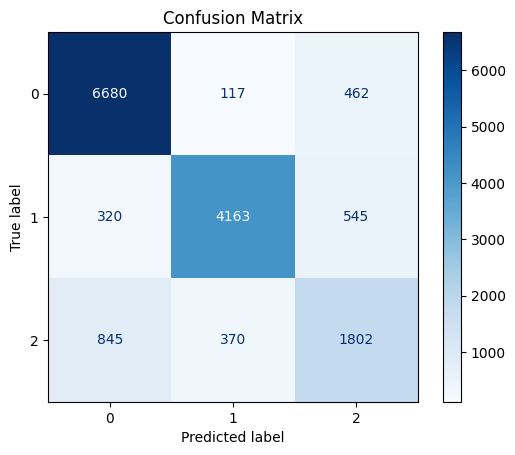

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7259
           1       0.90      0.83      0.86      5028
           2       0.64      0.60      0.62      3017

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.82      0.83      0.82     15304



In [75]:
xgb_pred = xgb_model.predict(X_test)
get_metrics(xgb_pred, y_test)

In [76]:
xgb_pred = xgb_model.predict(test_processed_df[X_columns])
xgb_pred

array([1, 0, 0, ..., 1, 1, 1])

In [77]:
get_submission(xgb_pred, test_processed_df["id"], ["Target"], "xgb_pred")

           id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Enrolled
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]


In [78]:
from sklearn.ensemble import VotingClassifier
# Create the VotingClassifier
vc_model = VotingClassifier(
    estimators=[
        ('rf', rf_model), 
        ('xgb', xgb_model)],
    voting='hard'  # Use 'soft' voting to use predict_proba for averaging
)
vc_model.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=55,
                                                     min_samples_leaf=2,
                                                     min_samples_split=15,
                                                     n_estimators=250)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            f...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

Accuracy: 0.823575535807632


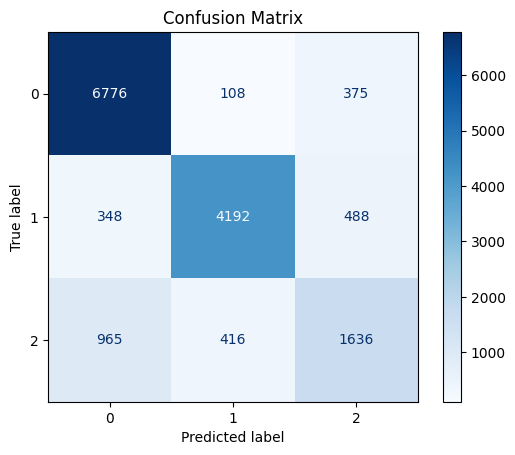

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7259
           1       0.89      0.83      0.86      5028
           2       0.65      0.54      0.59      3017

    accuracy                           0.82     15304
   macro avg       0.79      0.77      0.78     15304
weighted avg       0.82      0.82      0.82     15304



In [79]:
vc_pred = vc_model.predict(X_test)
get_metrics(vc_pred, y_test)

In [80]:
vc_pred = vc_model.predict(test_processed_df[X_columns])
vc_pred

array([1, 0, 0, ..., 1, 1, 1])

In [81]:
get_submission(vc_pred, test_processed_df["id"], ["Target"], "vc_pred")

           id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]
